<div style="background-color:pink; padding:10px;">
<span style="color:blue;font-family: Verdana;"><center><h1>Pima Indians Diabetes Database</h1></center></span>
<i><sapn><center><h2>Predicting whether a patient has diabetes or not, based on diagnostic measurements.</h1></center></sapn></i>

</div>

## <u><span style="color:red;">Problem Statement:</span></u>
<span style="font-family: 'Verdana';"><i><h4>Develop a predictive model that Predict whether a patient has diabetes or not, based on diagnostic measurements.</h4></i></span>
## <u><span style="color:#6F4E37;">Objective:</span></u>
<span style="font-family: 'Verdana';"><i><h4>To develop a predictive model that accurately determines whether a patient is likely to be diagnosed with diabetes based on diagnostic health measurements, using the Pima Indians Diabetes Dataset. The model aims to assist healthcare professionals in early identification of diabetes risk using machine learning techniques.</h4></i></span>
## <u><span style="color:#000080;">Data Structure:</span></u>
<span style="font-size: 18px; font-family: 'Times New Roman';">
<b>Number of Columns:</b> 09<br>
<b>Number of Rows:</b>768<br>
<b>Target Feature:</b>Outcome(0/1)<br>
<b> PIMA refers to the Pima people, a group of Native American Indians from the southwestern United States (mainly Arizona) and northern Mexico. 
PIMA = Pima Indian Medical Analysis </b><br>

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;"> 
<center>Loading Necessary Libraries</center>
</div>

In [1]:
# data analysis, visualization
import pandas as pd
import numpy as np
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.metrics import precision_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;"> 
    <center>Data Structure Loading and Inspection</center>
</div>

In [2]:
# Read Data
data = pd.read_csv("diabetes.csv")

In [3]:
# Dataset Dimension
data.shape

(768, 9)

In [4]:
#Fetching first few records
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### <span style="font-family: 'Verdana';"> Basic Summary of the Dataset</span>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### <span style="font-family: 'Verdana';"> Numerical Features Statistics </span>

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### <span style="font-family: 'Verdana';"><u> Numerical features description insights</u></span>
<span style="font-family: 'Verdana';">
Glucose, BloodPressure, BMI, Insulin, SkinThickness are medical measurements that should never be zero in a living person.<br>
Zeroes likely represent missing values that were not imputed or cleaned during data entry.<br>
Dataset contain outliers in features like Insulin, BMI, SkinThickness
</span>

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Data Cleaning</center>
</div>

#### <span style="font-family: 'Verdana';">Handling Null Values</span>

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### <span style="font-family: 'Verdana';">Handling Duplicated Records</span>

In [8]:
data.duplicated().sum()

0

#### <span style="font-family: 'Verdana';">Handling zeros in some features like Glucose, BloodPressure, BMI, Insulin, SkinThickness</span>

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
col_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col_list:
    print(i)
    print(data[data[i]==0][i].count())
    print("_"*20)

Glucose
5
____________________
BloodPressure
35
____________________
SkinThickness
227
____________________
Insulin
374
____________________
BMI
11
____________________
DiabetesPedigreeFunction
0
____________________
Age
0
____________________


In [11]:
# Replacing 0 with nan
col_list1 = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
data[col_list1] = data[col_list1].replace(0,np.nan)

In [12]:
# checking zeros again
col_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col_list:
    print(i)
    print(data[data[i]==0][i].count())
    print("_"*20)

Glucose
0
____________________
BloodPressure
0
____________________
SkinThickness
0
____________________
Insulin
0
____________________
BMI
0
____________________
DiabetesPedigreeFunction
0
____________________
Age
0
____________________


#### <span style="font-family: 'Verdana';">Handling Null Values after updating nan's</span>

In [13]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# filling Null values
data = data.fillna({'Glucose':data['Glucose'].median(),
                    'BloodPressure':data['BloodPressure'].median(),
                    'SkinThickness':data['SkinThickness'].median(),
                    'Insulin':data['Insulin'].median(),
                    'BMI':data['BMI'].median()})

In [15]:
# checking null values again
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>EXPLORATORY DATA ANALYSIS</center>
</div>

#### <span style="font-family: 'Verdana';">Fetching Discrete and Continuous Features</span>

In [16]:
discrete_col =  [col for col in data.columns if data[col].nunique() <10]
continuous_col = [col for col in data.columns if data[col].nunique() >10]

In [17]:
print(discrete_col)
print("_"*20)
print(continuous_col)

['Outcome']
____________________
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


#### <span style="font-family: 'Verdana';">Visualization of Univariate Analysis of Continuous Features</span>

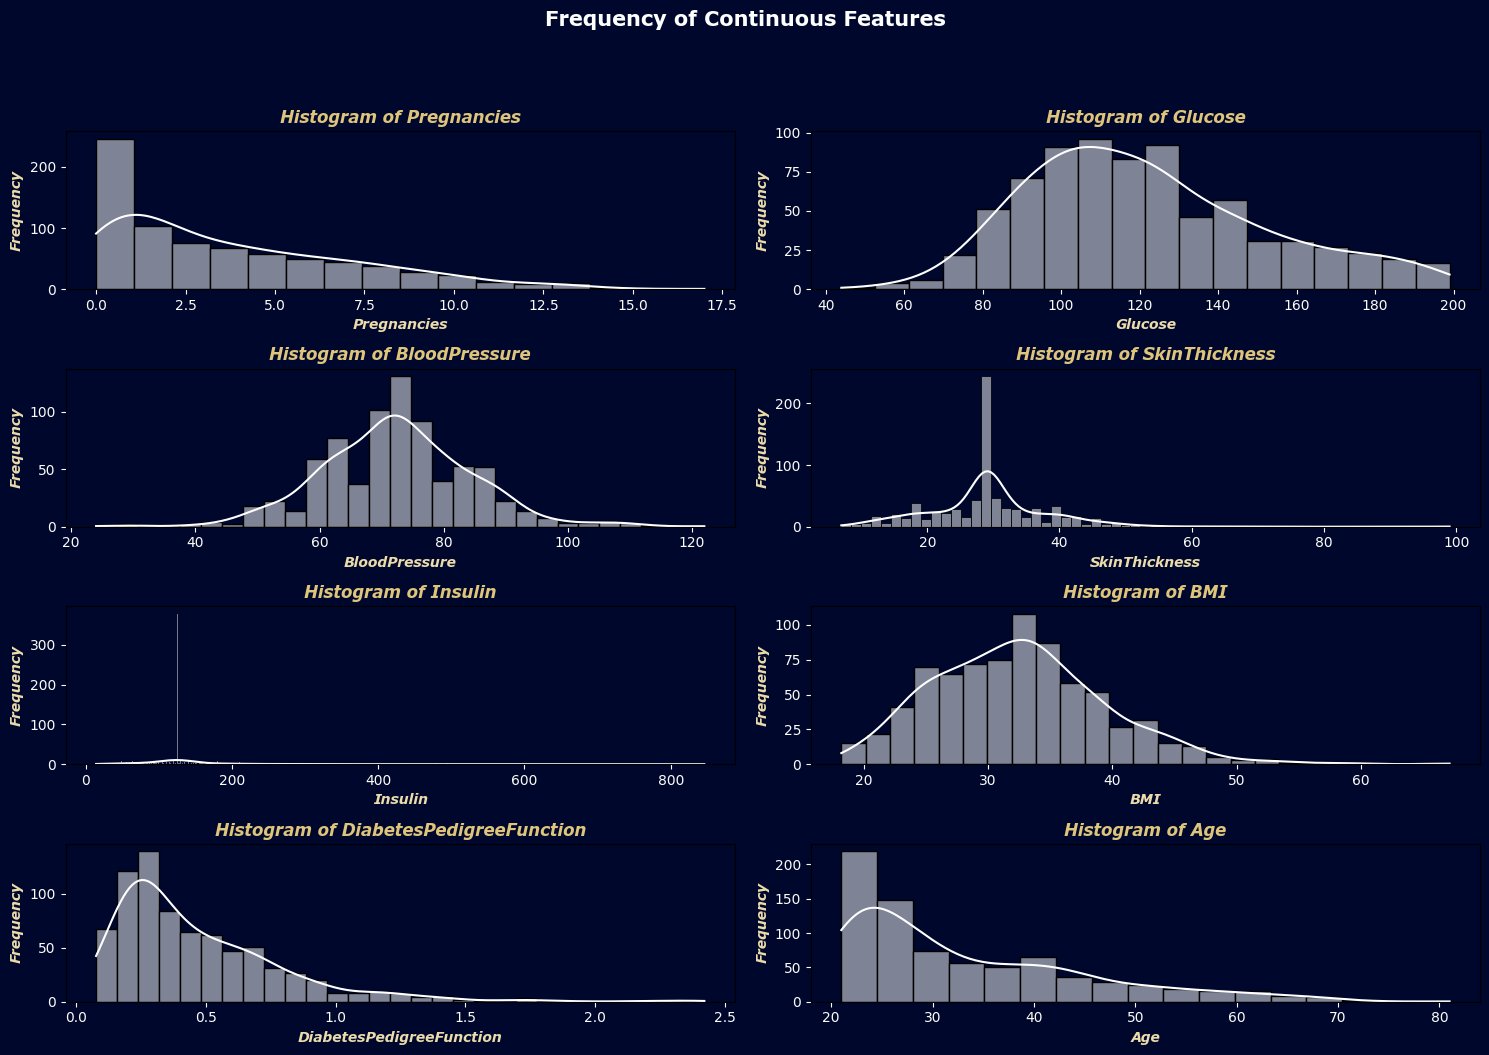

In [18]:
fig,ax = plt.subplots(4,2,figsize=(15,10))
ax = ax.flatten() # convert 2d into 1d so we can easly iterate.
fig.patch.set_facecolor('#00072D') # patch used in rectagular shaped chart
fig.suptitle('Frequency of Continuous Features', 
             fontsize=15, 
             fontweight='bold', 
             fontname='Verdana', 
             color='white', 
             y=1.05)
for i,col in enumerate(continuous_col):
    row = i //2
    col_index = i%2
    sns.histplot(data=data,
                 x=col,
                 color="white",
                 edgecolor='black',
                 kde=True,ax=ax[i])
    ax[i].set_title(f"Histogram of {col}",fontname='Verdana',fontweight='bold',fontstyle='italic',color='#DFC57B')
    ax[i].set_xlabel(col,fontname='Verdana',fontweight='bold',fontstyle='italic',color='#ECDCAB')
    ax[i].set_ylabel("Frequency",fontname='Verdana',fontweight='bold',fontstyle='italic',color='#ECDCAB')
    ax[i].tick_params(colors='#FCFCF7')
    ax[i].set_facecolor('#00072D')


# Turn off unused subplots if there are fewer than 9 columns
for j in range(len(continuous_col), len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()


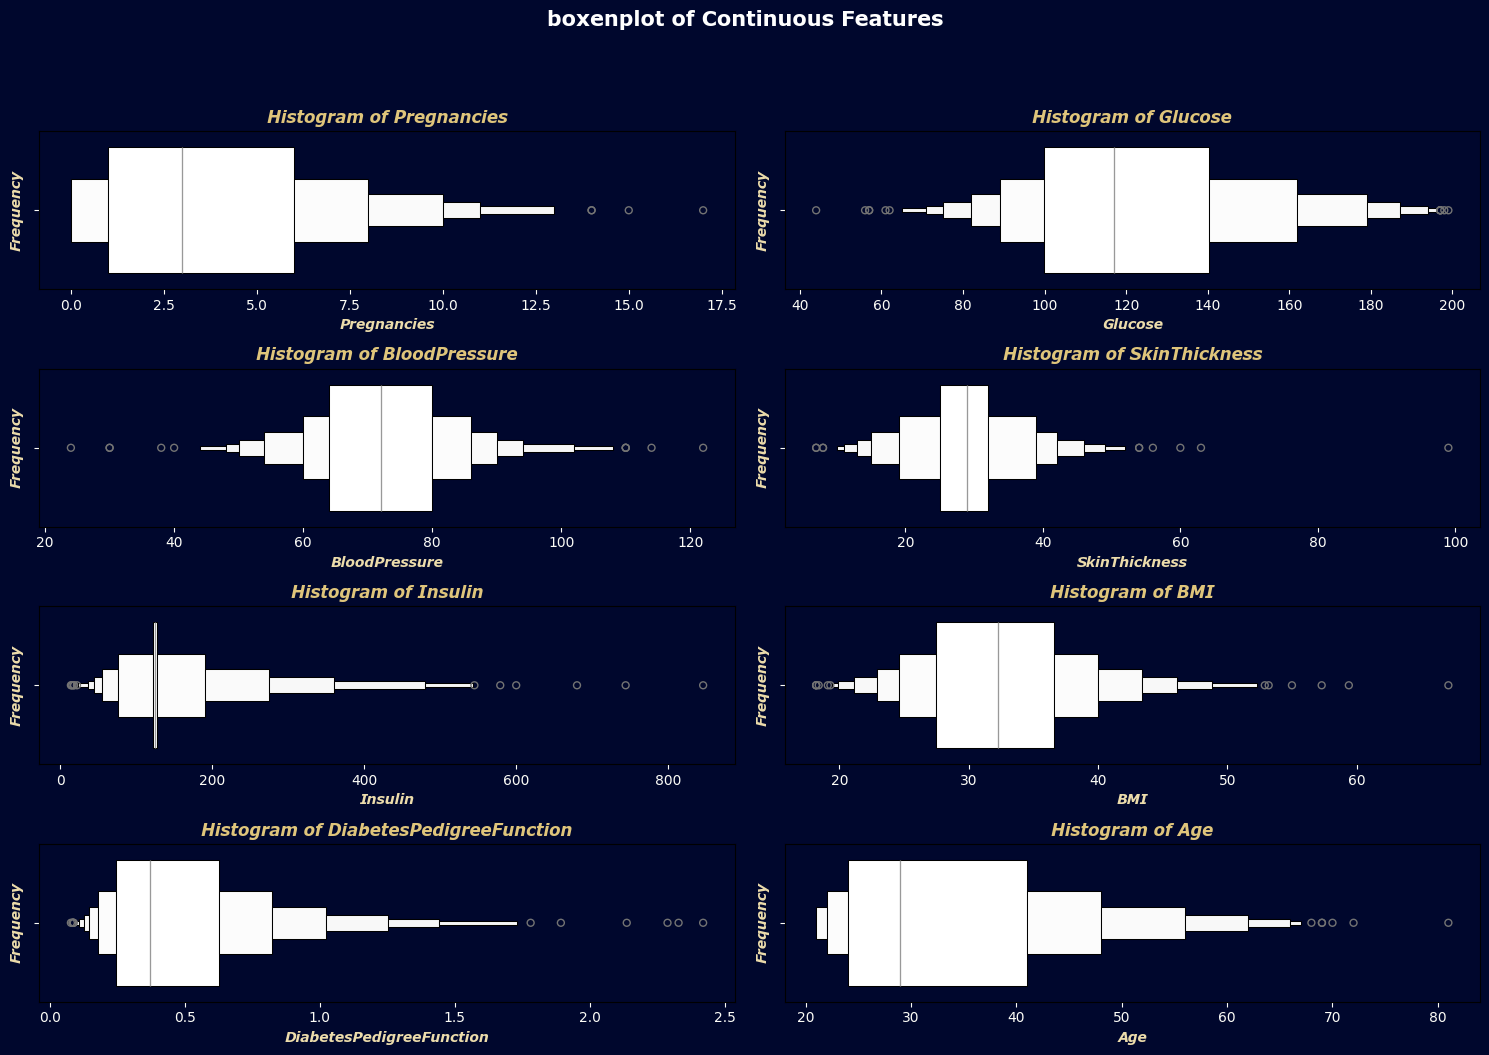

In [19]:
fig,ax = plt.subplots(4,2,figsize=(15,10))
ax = ax.flatten() # convert 2d into 1d so we can easly iterate.
fig.patch.set_facecolor('#00072D') # patch used in rectagular shaped chart
fig.suptitle('boxenplot of Continuous Features', 
             fontsize=15, 
             fontweight='bold', 
             fontname='Verdana', 
             color='white', 
             y=1.05)
for i,col in enumerate(continuous_col):
    row = i //2
    col_index = i%2
    sns.boxenplot(data=data,
                 x=col,
                 color="white",
                 edgecolor='black',
                ax=ax[i])
    ax[i].set_title(f"Histogram of {col}",fontname='Verdana',fontweight='bold',fontstyle='italic',color='#DFC57B')
    ax[i].set_xlabel(col,fontname='Verdana',fontweight='bold',fontstyle='italic',color='#ECDCAB')
    ax[i].set_ylabel("Frequency",fontname='Verdana',fontweight='bold',fontstyle='italic',color='#ECDCAB')
    ax[i].tick_params(colors='#FCFCF7')
    ax[i].set_facecolor('#00072D')


# Turn off unused subplots if there are fewer than 9 columns
for j in range(len(continuous_col), len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

#### <span style="font-family: 'Verdana';">Visualization of Univariate Analysis of Discrete Features</span>

In [20]:
fig = px.pie(data, 
             names='Outcome', 
             title='Distribution of Diabetes Outcome',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textinfo='percent+label')  # show % and label
fig.show()

In [21]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

##### <span style="font-family: 'Verdana';">Visualization of Bivariate Analysis of Continues Features with Target Feature</span>

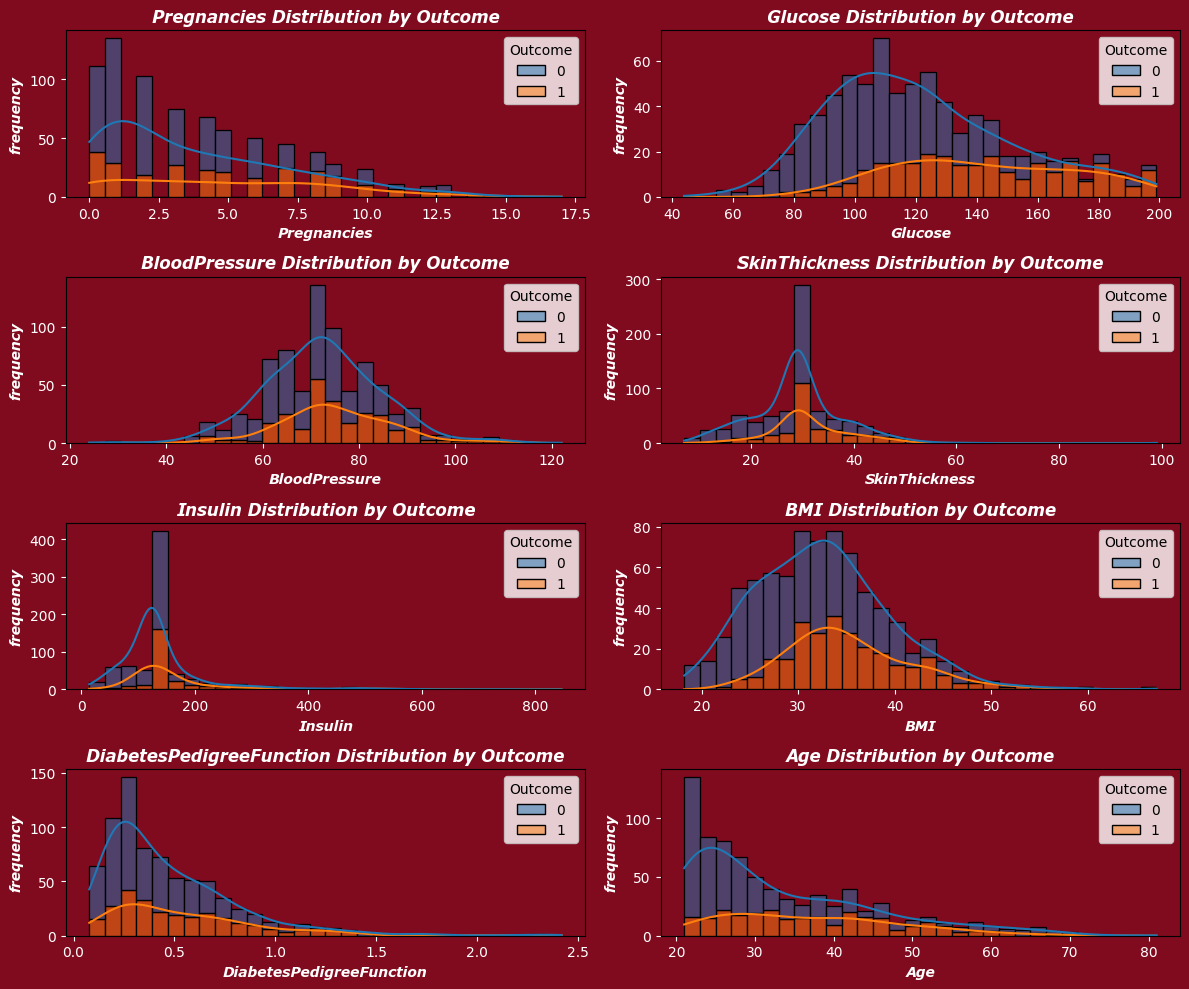

In [22]:
fig,ax = plt.subplots(4,2,figsize=(12,10))
ax = ax.flatten()
fig.patch.set_facecolor('#800B1F')
continuous_bi = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i, col in enumerate(continuous_bi):
    sns.histplot(data=data, x=col, hue='Outcome', multiple="stack",ax=ax[i],bins=30,kde=True)
    ax[i].set_title(f'{col} Distribution by Outcome',color='white',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_xlabel(col,color='white',fontname='Verdana',weight='bold',style='italic')
    ax[i].set_ylabel("frequency",color='white',fontname='Verdana',weight='bold',style='italic')
    ax[i].tick_params(colors='white')
    ax[i].set_facecolor('#800B1F')
if len(continuous_bi) < len(ax):
    fig.delaxes(ax[len(continuous_bi)])
plt.tight_layout()
plt.show()

##### <span style="font-family: 'Verdana';">Handling Correlation of Features</span>

In [23]:
corr = data.corr()

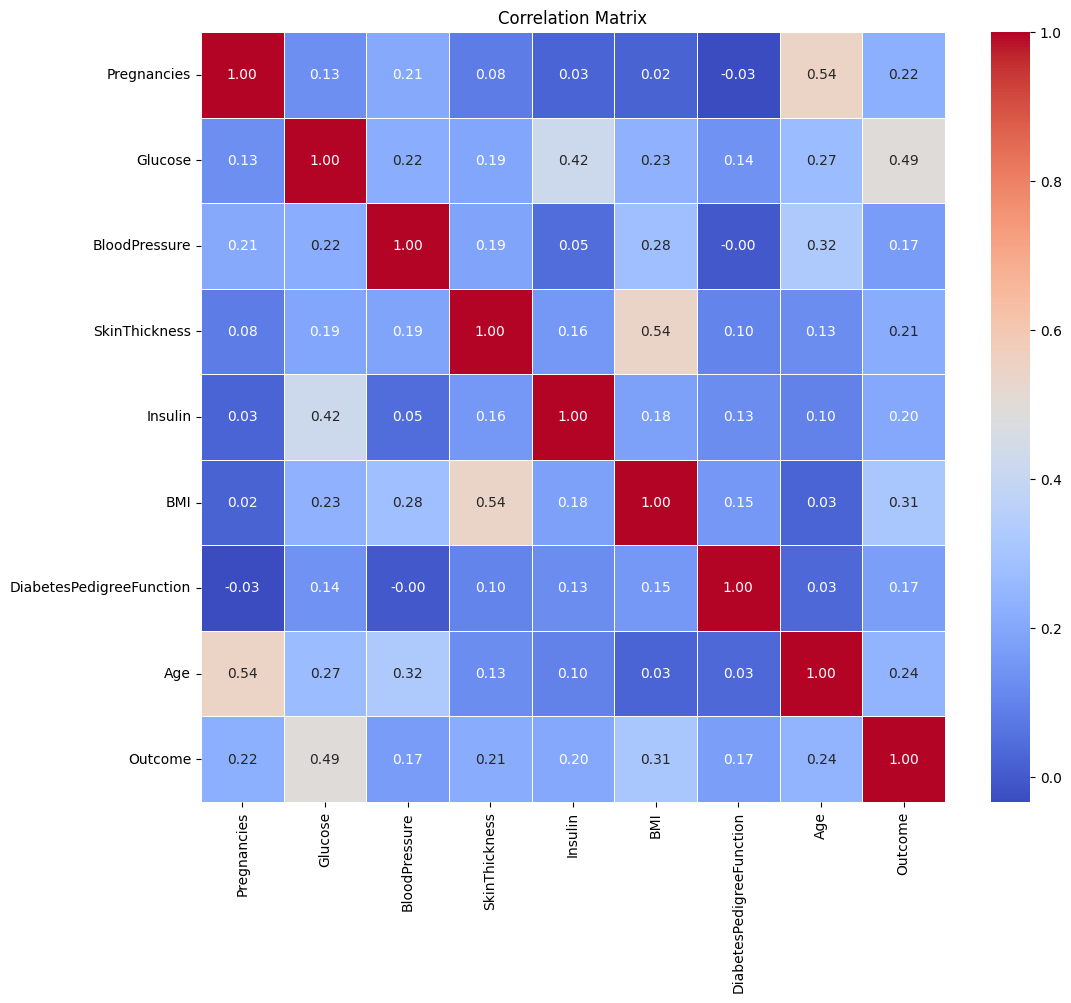

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Feature Engineering and Preprocessing</center>
</div>

##### <span style="font-family: 'Verdana';">Spliting and Transformation</span>

In [25]:
x = data.drop(columns=['Outcome'])
y = data['Outcome']

In [26]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Model Selection and Training</center>
</div>

##### <span style="font-family: 'Verdana';">LogisticRegression</span>

In [28]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [29]:
y_train_pred = logistic_model.predict(x_train)
print(classification_report(y_train,y_train_pred))
print("*"*20)
print("Precision score=", precision_score(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       401
           1       0.35      1.00      0.52       213

    accuracy                           0.35       614
   macro avg       0.17      0.50      0.26       614
weighted avg       0.12      0.35      0.18       614

********************
Precision score= 0.3469055374592834


In [30]:
# using SMOT

smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_train_scaled, y_train)

In [31]:
logistic_model.fit(x_resampled,y_resampled)

LogisticRegression()

In [32]:
y_train_pred = logistic_model.predict(x_resampled)
print(classification_report(y_resampled,y_train_pred))
print("*"*20)
print("Precision score=", precision_score(y_resampled,y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       401
           1       0.76      0.73      0.75       401

    accuracy                           0.75       802
   macro avg       0.75      0.75      0.75       802
weighted avg       0.75      0.75      0.75       802

********************
Precision score= 0.7577319587628866


In [33]:
y_test_pred = logistic_model.predict(x_test)
print(classification_report(y_test,y_test_pred))
print("*"*20)
print("Precision score=", precision_score(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.36      1.00      0.53        55

    accuracy                           0.36       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.13      0.36      0.19       154

********************
Precision score= 0.35714285714285715


In [34]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 0, 99],
       [ 0, 55]], dtype=int64)

##### <span style="font-family: 'Verdana';">Decision Tree</span>

In [35]:
#DT without SMOTE
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

###### <span style="font-family: 'Verdana';">Decision Tree without SMOTE</span>

In [36]:
dt_y_train_pred = dt_model.predict(x_train_scaled)
print(classification_report(y_train,dt_y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [37]:
dt_y_test_pred = dt_model.predict(x_test_scaled)
print(classification_report(y_test,dt_y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        99
           1       0.58      0.60      0.59        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.70      0.70       154



###### <span style="font-family: 'Verdana';">Decision Tree with SMOTE</span>

In [38]:
# DT with SMOTE
dt_model.fit(x_resampled, y_resampled)

DecisionTreeClassifier()

In [39]:
dt_resampled_test_pred = dt_model.predict(x_test_scaled)
print(classification_report(y_test,dt_resampled_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70        99
           1       0.48      0.58      0.53        55

    accuracy                           0.63       154
   macro avg       0.61      0.62      0.61       154
weighted avg       0.65      0.63      0.64       154



###### <span style="font-family: 'Verdana';">Decision Tree with class_weight='balanced'</span>

In [40]:
# DT with balanced class
dt_balanced = RandomForestClassifier(class_weight='balanced')
dt_balanced.fit(x_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced')

In [41]:
y_test_balanced_pred = dt_balanced.predict(x_test_scaled)
print(classification_report(y_test,y_test_balanced_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



###### <span style="font-family: 'Verdana';">Decision Tree with Hyper parameter tuning </span>

In [42]:
# Step 1: Random search
rf = RandomForestClassifier(random_state=42)

random_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(
    rf, random_params, n_iter=10, scoring='f1', cv=5, random_state=42
)
random_search.fit(x_train_scaled, y_train)

print("Best params from RandomizedSearchCV:", random_search.best_params_)

# Step 2: Grid search around best values
grid_params = {
    'n_estimators': [random_search.best_params_['n_estimators']],
    'max_depth': [random_search.best_params_['max_depth']],
    'min_samples_split': [2, 3, 4, 5]  # narrowed grid
}

grid_search = GridSearchCV(
    rf, grid_params, scoring='f1', cv=5
)
grid_search.fit(x_train_scaled, y_train)

print("Best params from GridSearchCV:", grid_search.best_params_)


Best params from RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
Best params from GridSearchCV: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [43]:
tuned_dt = DecisionTreeClassifier(min_samples_split=2, class_weight='balanced')
tuned_dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [44]:
dt_y_tuned_pred = tuned_dt.predict(x_test_scaled)
print(classification_report(y_test,dt_y_tuned_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



##### <span style="font-family: 'Verdana';">Random Forest</span>

In [45]:
rt = RandomForestClassifier(random_state=40)
rt.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=40)

In [46]:
rt_y_pred = rt.predict(x_test_scaled)
print(classification_report(y_test,rt_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        99
           1       0.66      0.75      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



In [47]:
rt_balance_model = RandomForestClassifier(class_weight='balanced')
rt_balance_model.fit(x_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced')

In [48]:
rt_model_balan_pred = rt_balance_model.predict(x_test_scaled)
print(classification_report(y_test,rt_model_balan_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



##### <span style="font-family: 'Verdana';">XGBoost</span>

In [49]:
xg_model = xgb.XGBClassifier()
xg_model.fit(x_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [50]:
xg_pred = xg_model.predict(x_test_scaled)
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.64      0.75      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



<div style="font-size: 20px;font-weight:bold;background-color:lightgray; padding:10px;">
<center>Conclusion</center>
</div>

 <span style="font-family: 'Verdana';">
✅ Random Forest without SMOTE or class_weight gives the best overall performance:

F1 (class 0): 0.82

F1 (class 1): 0.70 ← this is very solid for a minority class

No need for extra balancing or complexity
</span>

In [52]:
import joblib
joblib.dump(rt,'model.pkl')
joblib.dump(scalar,'scalar.pkl')

['scalar.pkl']